In [74]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

sustainable = pd.read_csv('global-data-on-sustainable-energy (1).csv')

In [75]:
sustainable

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [76]:
sustainable_drop = ['Access to clean fuels for cooking',"Electricity from nuclear (TWh)","Energy intensity level of primary energy (MJ/$2017 PPP GDP)","Value_co2_emissions_kt_by_country","Renewables (% equivalent primary energy)",'Latitude','Longitude']
sustainable = sustainable.drop(sustainable_drop, axis=1)

In [77]:
sustainable.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)'],
      dtype='object')

In [78]:
sustainable.columns = sustainable.columns.str.replace(' ', '_')

In [79]:
sustainable.head(25)

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land_Area(Km2)
0,Afghanistan,2000,1.613591,9.22,20000.0,44.99,0.16,0.31,65.957440,302.59482,NaN,NaN,60,652230.0
1,Afghanistan,2001,4.074574,8.86,130000.0,45.60,0.09,0.50,84.745766,236.89185,NaN,NaN,60,652230.0
2,Afghanistan,2002,9.409158,8.47,3950000.0,37.83,0.13,0.56,81.159424,210.86215,NaN,179.426579,60,652230.0
3,Afghanistan,2003,14.738506,8.09,25970000.0,36.66,0.31,0.63,67.021280,229.96822,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.064968,7.75,NaN,44.24,0.33,0.56,62.921350,204.23125,1.414118,211.382074,60,652230.0
5,Afghanistan,2005,25.390894,7.51,9830000.0,33.88,0.34,0.59,63.440857,252.06912,11.229715,242.031313,60,652230.0
6,Afghanistan,2006,30.718690,7.40,10620000.0,31.89,0.20,0.64,76.190475,304.42090,5.357403,263.733602,60,652230.0
7,Afghanistan,2007,36.051010,7.25,15750000.0,28.78,0.20,0.75,78.947370,354.27990,13.826320,359.693158,60,652230.0
8,Afghanistan,2008,42.400000,7.49,16170000.0,21.17,0.19,0.54,73.972600,607.83350,3.924984,364.663542,60,652230.0
9,Afghanistan,2009,46.740050,7.50,9960000.0,16.53,0.16,0.78,82.978720,975.04816,21.390528,437.268740,60,652230.0


In [80]:
sustainable['Access_to_electricity_(%_of_population)'] = sustainable['Access_to_electricity_(%_of_population)'].round()

In [81]:
sustainable

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land_Area(Km2)
0,Afghanistan,2000,2.0,9.22,20000.0,44.99,0.16,0.31,65.957440,302.59482,NaN,NaN,60,652230.0
1,Afghanistan,2001,4.0,8.86,130000.0,45.60,0.09,0.50,84.745766,236.89185,NaN,NaN,60,652230.0
2,Afghanistan,2002,9.0,8.47,3950000.0,37.83,0.13,0.56,81.159424,210.86215,NaN,179.426579,60,652230.0
3,Afghanistan,2003,15.0,8.09,25970000.0,36.66,0.31,0.63,67.021280,229.96822,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.0,7.75,NaN,44.24,0.33,0.56,62.921350,204.23125,1.414118,211.382074,60,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,43.0,62.88,30000.0,81.90,3.50,3.32,48.680350,3227.68020,0.755869,1464.588957,38,390757.0
3645,Zimbabwe,2017,44.0,62.33,5570000.0,82.46,3.05,4.30,58.503407,3068.01150,4.709492,1235.189032,38,390757.0
3646,Zimbabwe,2018,46.0,82.53,10000.0,80.23,3.73,5.46,59.412407,3441.98580,4.824211,1254.642265,38,390757.0
3647,Zimbabwe,2019,47.0,81.40,250000.0,81.50,3.66,4.58,55.582527,3003.65530,-6.144236,1316.740657,38,390757.0


In [82]:
sustainable.dtypes

Entity                                                               object
Year                                                                  int64
Access_to_electricity_(%_of_population)                             float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial_flows_to_developing_countries_(US_$)                      float64
Renewable_energy_share_in_the_total_final_energy_consumption_(%)    float64
Electricity_from_fossil_fuels_(TWh)                                 float64
Electricity_from_renewables_(TWh)                                   float64
Low-carbon_electricity_(%_electricity)                              float64
Primary_energy_consumption_per_capita_(kWh/person)                  float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density\n(P/Km2)                                                     object
Land_Area(Km

In [83]:
sustainable.rename(columns={r'Density\n(P/Km2)': 'Density'}, inplace=True)

In [84]:
pr_data = sustainable[sustainable['Entity'] == 'Puerto Rico'] 
pr_data

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density,Land_Area(Km2)
2682,Puerto Rico,2000,100.0,27.20,NaN,0.55,21.66,0.15,0.687758,33807.605,3.271965,16192.12697,368,9104.0
2683,Puerto Rico,2001,100.0,27.19,NaN,0.54,22.17,0.13,0.582960,36749.920,6.313472,18123.19870,368,9104.0
2684,Puerto Rico,2002,100.0,27.29,NaN,0.50,23.06,0.11,0.474752,37742.360,0.916459,18731.45939,368,9104.0
2685,Puerto Rico,2003,100.0,27.37,NaN,0.50,23.83,0.10,0.417885,39338.190,0.053420,19557.12025,368,9104.0
2686,Puerto Rico,2004,100.0,27.40,NaN,0.50,23.99,0.14,0.580191,40723.620,8.748677,20988.99233,368,9104.0
2687,Puerto Rico,2005,100.0,38.00,NaN,0.56,24.82,0.14,0.560897,39564.490,-1.986939,21959.32270,368,9104.0
2688,Puerto Rico,2006,100.0,39.19,NaN,0.48,23.69,0.14,0.587495,36062.957,-1.409414,22935.94116,368,9104.0
2689,Puerto Rico,2007,100.0,45.35,NaN,0.49,22.14,0.16,0.717489,34952.594,-1.162807,23664.88235,368,9104.0
2690,Puerto Rico,2008,100.0,43.24,NaN,0.51,20.76,0.16,0.764818,32875.305,-1.844134,24898.33459,368,9104.0
2691,Puerto Rico,2009,100.0,44.43,NaN,0.52,20.53,0.17,0.821256,30928.209,-1.952425,25768.72589,368,9104.0


In [85]:
pr_data.columns

Index(['Entity', 'Year', 'Access_to_electricity_(%_of_population)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial_flows_to_developing_countries_(US_$)',
       'Renewable_energy_share_in_the_total_final_energy_consumption_(%)',
       'Electricity_from_fossil_fuels_(TWh)',
       'Electricity_from_renewables_(TWh)',
       'Low-carbon_electricity_(%_electricity)',
       'Primary_energy_consumption_per_capita_(kWh/person)', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land_Area(Km2)'],
      dtype='object')

In [86]:
def average_data_pr(pr_data,value_column):
    """This will give us the mean of renewable energy from the Puerto Rico dataset"""
    mean_change = pr_data['Low-carbon_electricity_(%_electricity)'].mean()
    return round(mean_change),"%"

In [87]:
def rate_of_change_pr(pr_data,value_column):
    """this function will create a new column called Rate of Change which will include de difference year over year"""
    pr_data['Rate_of_Change'] = pr_data['Low-carbon_electricity_(%_electricity)'].diff()
    pr_data.loc[pr_data['Year'] == 2000, 'Rate_of_Change'] = 0
    return pr_data

In [88]:
from sklearn.linear_model import LinearRegression
import numpy as np

def prediction_model_pr(pr_data,value_column, target_year):
    """Linear regression model and predicts the renewable electricity percentage for a given year.
    
    The Parameters:
    pr_data: The established dataframe
    value_column: The name of the column with low-carbon electricity percentage values.
    target_year: The year for which to predict the percentage."""
    pr_data = rate_of_change_pr(pr_data,value_column)
    x = pr_data[['Year','Rate_of_Change']]
    y = pr_data['Low-carbon_electricity_(%_electricity)']
    model = LinearRegression()
    model.fit(x, y)
    rate_of_change_for_prediction = pr_data['Rate_of_Change'].mean()
    x_predict = np.array([[target_year, rate_of_change_for_prediction]])
    y_predict = model.predict(x_predict)
    prediction = f"{y_predict[0]:.2f}%"
    return prediction

C:\Users\baort\AppData\Local\Temp\ipykernel_27504\1581894399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_data['Rate_of_Change'] = pr_data['Low-carbon_electricity_(%_electricity)'].diff()
c:\Users\baort\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


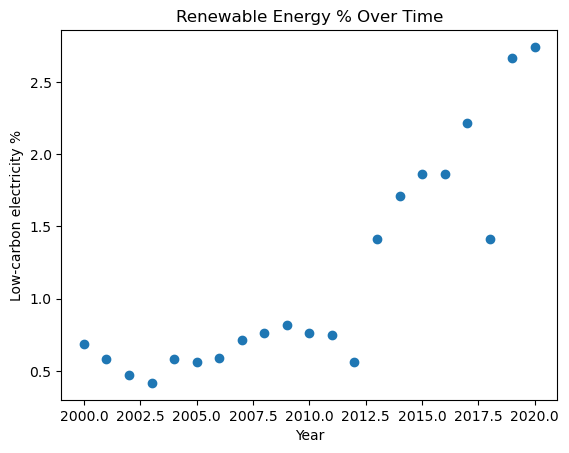

Predicted renewable electricity percentage for Puerto Rico in 2025: 2.57%


In [89]:
year_1 = 2025
predicted_percentage=prediction_model_pr(pr_data, 'Low-carbon_electricity_(%_electricity)', year_1)


plt.scatter(pr_data['Year'], pr_data['Low-carbon_electricity_(%_electricity)'])

plt.title('Renewable Energy % Over Time')
plt.xlabel('Year')
plt.ylabel('Low-carbon electricity %')
plt.show()

print(f"Predicted renewable electricity percentage for Puerto Rico in {year_1}: {predicted_percentage}")

In [90]:
pr_data['Year'].value_counts()

Year
2000    1
2011    1
2019    1
2018    1
2017    1
2016    1
2015    1
2014    1
2013    1
2012    1
2010    1
2001    1
2009    1
2008    1
2007    1
2006    1
2005    1
2004    1
2003    1
2002    1
2020    1
Name: count, dtype: int64

In [91]:
sustainable.columns

Index(['Entity', 'Year', 'Access_to_electricity_(%_of_population)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial_flows_to_developing_countries_(US_$)',
       'Renewable_energy_share_in_the_total_final_energy_consumption_(%)',
       'Electricity_from_fossil_fuels_(TWh)',
       'Electricity_from_renewables_(TWh)',
       'Low-carbon_electricity_(%_electricity)',
       'Primary_energy_consumption_per_capita_(kWh/person)', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land_Area(Km2)'],
      dtype='object')

In [92]:
# pip install openpyxl

In [93]:
# similar_density_PR(sustainable).to_excel('silimar_density_validation.xlsx', index=False) # Troubleshooting

In [94]:
def similar_density_PR(sustainable, column = "Density", target_value = 368, tolerance=50):
    """filter will focus on countries that are similar in density to Puerto Rico"""
    sustainable["Density"] = pd.to_numeric(sustainable["Density"], errors='coerce')
    lower_bound = target_value - tolerance
    upper_bound = target_value + tolerance
    
    filtered_sustainable = sustainable[(sustainable["Density"] >= lower_bound) & (sustainable["Density"] <= upper_bound) & (sustainable['Entity'] != 'Tuvalu')]
    return filtered_sustainable


In [95]:
def rate_of_change(sustainable,value_column):
    """this function will create a new column called Rate of Change which will include de difference year over year
    2000 will have a value of 0 by default since it should not count the previous (othe country) value"""
    sustainable['Rate_of_Change'] = sustainable[value_column].diff()
    sustainable.loc[sustainable['Year'] == 2000, 'Rate_of_Change'] = 0
    return sustainable

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def prediction_model(filtered_sustainable,value_column, target_year):
    """Linear regression model and predicts the renewable electricity percentage for a given year.
    
    The Parameters:
    pr_data: The established dataframe
    value_column: The name of the column with low-carbon electricity percentage values.
    target_year: The year for which to predict the percentage."""
    filtered_sustainable = rate_of_change(filtered_sustainable,value_column)
    filtered_sustainable = filtered_sustainable.dropna(subset=['Year', 'Rate_of_Change', value_column])
    filtered_sustainable['Year'] = pd.to_numeric(filtered_sustainable['Year'], errors='coerce')
    filtered_sustainable[value_column] = pd.to_numeric(filtered_sustainable[value_column], errors='coerce')
    
    x = filtered_sustainable[['Year','Rate_of_Change']]
    y = filtered_sustainable[value_column]
    
    model = LinearRegression()
    model.fit(x, y)
    
    rate_of_change_for_prediction = filtered_sustainable['Rate_of_Change'].mean()
    x_predict = np.array([[target_year, rate_of_change_for_prediction]])
    y_predict = model.predict(x_predict)
    
    prediction = f"{y_predict[0]:.2f}%"
    return prediction

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
all_predictions=pd.DataFrame()

grouped_countries = filtered_sustainable.groupby('Entity')
year = 2025

for country, group in grouped_countries:
    group_copy = group.copy()
    group_copy['Rate_of_Change'] = imputer.fit_transform(group_copy[['Rate_of_Change']])
    
    if group_copy[['Year','Rate_of_Change']].isnull().any().any():
        print(f'Skipping prediction for {country} due to NaN values.')
        continue
    
    country_prediction = prediction_model(group_copy, 'Low-carbon_electricity_(%_electricity)', year)
    country_prediction_df = pd.DataFrame({'Entity': [country], 'Year': [year], 'Prediction': [country_prediction]})
    all_predictions = pd.concat([all_predictions, country_prediction_df], ignore_index=True)
print(all_predictions)    

C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

        Entity  Year Prediction
0      Belgium  2025     68.46%
1      Grenada  2025      0.00%
2        Haiti  2025     -8.15%
3       Israel  2025      2.95%
4        Japan  2025      8.40%
5  Philippines  2025     16.10%
6  Puerto Rico  2025      2.57%
7    Sri Lanka  2025     38.66%


C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\verus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\verus\AppData\Local\Temp\ipykernel_34000\1811306317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sustainable['Low-carbon_electricity_(%_electricity)'] = filtered_sustainable['Low-carbon_electricity_(%_electricity)'].astype('str')
C:\Users\verus\AppData\Local\Temp\ipykernel_34000\1811306317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sustainable['Low-carbon_electricity_(%_electricity)'] = filtered_sustainable['Low-carbon_electricity_(%_electricity)'].str.rstrip('%').

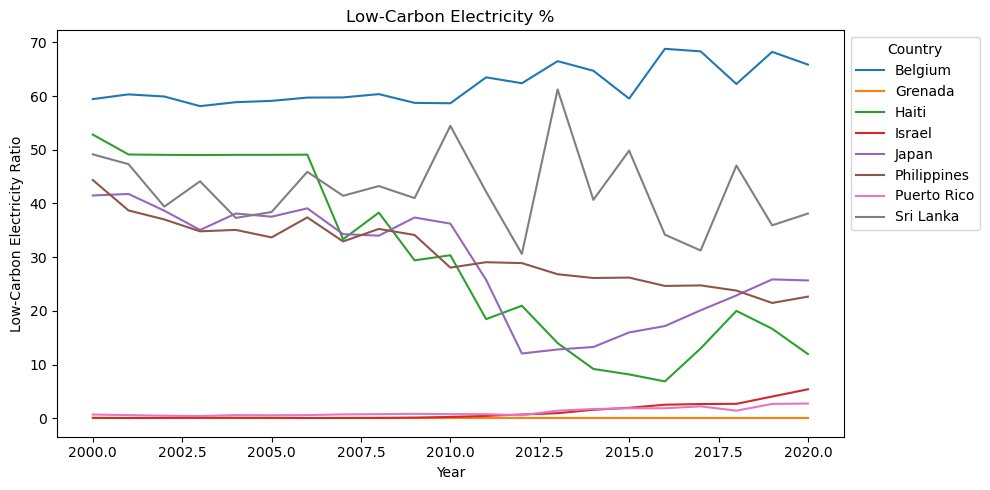

In [ ]:
import matplotlib.pyplot as plt

filtered_sustainable['Low-carbon_electricity_(%_electricity)'] = filtered_sustainable['Low-carbon_electricity_(%_electricity)'].astype('str')
filtered_sustainable['Low-carbon_electricity_(%_electricity)'] = filtered_sustainable['Low-carbon_electricity_(%_electricity)'].str.rstrip('%').astype('float')

pivot_predictions = filtered_sustainable.pivot(index='Year', columns='Entity', values='Low-carbon_electricity_(%_electricity)')

plt.figure(figsize=(10, 5))
for country in pivot_predictions.columns:
    plt.plot(pivot_predictions.index, pivot_predictions[country], label=country)

plt.title('Low-Carbon Electricity %')
plt.xlabel('Year')
plt.ylabel('Low-Carbon Electricity Ratio')


plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()